* # point class:

In [23]:
from math import *
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
        
    def set_point(self, newx, newy):
        self.x = newx
        self.y = newy
        
    def get_point(self):
        return self.x, self.y
    
    def distance_from_origin(self):
        return sqrt(self.x * self.x + self.y * self.y)
    
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return round(sqrt(dx * dx + dy * dy), 2)
    
    def translate(self, dx, dy):
        self.x += dx
        self.y += dy
    
    def print_point(self):
        print(self.__str__())
    
    def manhattan_dis(self, a):
        return abs(self.x - a.x) + abs(self.y - a.y)
        

* # point set class:

In [24]:
from math import *

class Point_set:
    def __init__(self, new_set):
        self.p_set = new_set
        
    def p_num(self):
        return len(self.p_set)
    
    def isEmpty(self):
        if len(self.p_set) is 0:
            return True
        return False
    
    def set_p(self, pos, point):
        self.p_set[pos] = point
        
    def get_p(self, i):
        return self.p_set[i]
    
    def insert_p(self, pos, point):
        self.p_set.insert(pos, point)
        
    def append_p(self, point):
        self.p_set.append(point)
        
    def delete_p(self, point):
        self.p_set.remove(point)
        
    def print_str(self):
        set_str = [i.__str__() for i in self.p_set]
        return set_str
    
    def get_distance(self, i, b):  # compare without the point list point
        return self.p_set[i].manhattan_dis(b)
    
    def get_dis(self, i, j):  # compare within the point list point
        return self.p_set[i].manhattan_dis(self.p_set[j])
    
    def sort(self):
        for i in range(self.p_num() - 1):
            for j in range(i, self.p_num()):
                if self.p_set[i].x > self.p_set[j].x:
                    temp = self.p_set[i]
                    self.p_set[i] = self.p_set[j]
                    self.p_set[j] = temp
    
    
    def nearest_BF(self):
        num = self.p_num()
        if num is 0 or num is 1:
            return float('inf'), Point(0, 0), Point(0, 0)
        else:
            min_dis = self.get_dis(0, 1)
            p1 = Point(0, 0) # initiation
            p2 = Point(0, 0)
            for i in range(num - 1):
                for j in range(i + 1, num):
                    dis = self.get_dis(i, j)
                    if min_dis > dis:
                        min_dis = dis
                        p1 = self.p_set[i]
                        p2 = self.p_set[j]
                        #print(p1, p2)
            return min_dis, p1, p2
            
    def nearest_DC(self):
        num = self.p_num()
        if num <= 3:  # if the number of point is not larger than 3, use brute force
            return self.nearest_BF()
        else:
            
            # divided list into n/2 by x value
            mid = num//2
            left = Point_set(self.p_set[:mid])
            right = Point_set(self.p_set[mid:])
            mid_x = (self.p_set[mid-1].x + self.p_set[mid].x)/2.0
            
            # conquer and recursive
            l_dis, lp1, lp2 = left.nearest_DC()
            r_dis, rp1, rp2 = right.nearest_DC()
            #print(type(lp1))
            
            d = min(l_dis, r_dis) # calculate the middle x number
            
            # solve middle band
            for i in left.p_set:
                if mid_x - i.x <= d:
                    for j in right.p_set:
                        if abs(i.x - j.x) <= d and abs(i.y - j.y) <= d:
                            p_dis = i.manhattan_dis(j)
                            if p_dis <= d:
                                return p_dis, i.get_point(), j.get_point() # band is smaller
            
            # if band is larger
            if l_dis <= r_dis:
                return d, lp1, lp2
            else:
                return d, rp1, rp2
        

# 1. ADT Point Class
Use the ADT class for points in 2-dimensional Euclidean space discussed in the lecture in Week 1 (see lecture notes), and extend the class this with a distance function for pairwise Manhattan distance.

In [25]:
a = Point(4, 2)
print("String display:", a.__str__())
a.set_point(3, 4)
print("Get point:", a.get_point())
print("distance from origin:", a.distance_from_origin())
b = Point(7, 2)
b.translate(2, 4)
print("Print new point:")
b.print_point()
print("Distance:", a.distance(b))
print("Manhattan Distance :", a.manhattan_dis(b))

String display: (4, 2)
Get point: (3, 4)
distance from origin: 5.0
Print new point:
(9, 6)
Distance: 6.32
Manhattan Distance : 8


# 2. ADT Point Set Class
Based on this point class, implement an ADT class that models a point set. It will need a constructor as well as functions to insert and delete points in the set (you do not need to implement union, intersection, or other set operations at this point).

In [26]:
c = Point(3, 5)
d = Point(6, 2)
e = Point(10, 5)
f = Point(4, 1)
g = Point(9, 1)
h = Point(5, 5)
i = Point(3, 7)

In [27]:
x = Point_set([a, b, c, d, f, g, h])
print("Test if there is no point:", x.isEmpty())
x.insert_p(1, i)
print("Point set contains (after insert):", x.print_str())
x.delete_p(a)
print("Point set contains (after delete):", x.print_str())
x.insert_p(0, a)
print(x.print_str())
print("Total number of points:", x.p_num())
print("Distance between point 1 and point 3:", x.get_dis(0, 2))

Test if there is no point: False
Point set contains (after insert): ['(3, 4)', '(3, 7)', '(9, 6)', '(3, 5)', '(6, 2)', '(4, 1)', '(9, 1)', '(5, 5)']
Point set contains (after delete): ['(3, 7)', '(9, 6)', '(3, 5)', '(6, 2)', '(4, 1)', '(9, 1)', '(5, 5)']
['(3, 4)', '(3, 7)', '(9, 6)', '(3, 5)', '(6, 2)', '(4, 1)', '(9, 1)', '(5, 5)']
Total number of points: 8
Distance between point 1 and point 3: 8


# 3. Closest Pair
Extend the point set class with a method to find the closest pair of points. Your method should
return the coordinates of the two points that have the smallest pairwise distance in the set as well
as this distance. Bear in mind that we are now using Manhattan distance. Give a brief discussion
what (if anything) you need to change in the algorithm to accomodate Manhattan distance and
justify your answer_ precisely. Implement two diff erent versions as methods in the point set class
you have implemented above:

##### a. Brute Force Implementation

In [20]:
dis, po1, po2 = x.nearest_BF()
print("The nearest distance is:", dis, "\nAnd the two points are:", po1, po2)

The nearest distance is: 1 
And the two points are: (3, 4) (3, 5)


##### b. Divide & Conquer Implementation

In [28]:
x.sort()
dis, po1, po2 = x.nearest_DC()
print("The nearest distance is:", dis, "\nAnd the two points are:", po1, po2)

The nearest distance is: 1 
And the two points are: (3, 4) (3, 5)


# 4. Runtime - Empirical Analysis
Perform an empirical runtime evaluation for both your algorithms using the Python timeit library. Plot runtime graphs for both algorithms for a reasonable rage of input sizes (you do not need to plot these using Python, but you are of course welcome to do so). Discuss briefly whether your plots substantiate your expectations.

In [138]:
import random
# print(x.print_str())
def test_set():
    ls1 = Point_set([])
    ls2 = Point_set([])
    ls3 = Point_set([])
    ls4 = Point_set([])
    ls5 = Point_set([])
    ls6 = Point_set([])
    ls7 = Point_set([])
    
    ls = [ls1, ls2, ls3, ls4, ls5, ls6, ls7]
    ran_num = [10, 50, 100, 200, 400, 800, 1000]
    for i in range(10):
        ls1.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    for i in range(50):
        ls2.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    for i in range(100):
        ls3.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    for i in range(200):
        ls4.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    for i in range(400):
        ls5.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    for i in range(800):
        ls6.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    for i in range(1000):
        ls7.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    return ls

ls = test_set()

In [144]:
import timeit
def test_BF():
    a = timeit.Timer('ls[0].nearest_BF()', setup = 'from __main__ import ls')
    print(a.timeit(number = 500))
    b = timeit.Timer('ls[1].nearest_BF()', setup = 'from __main__ import ls')
    print(b.timeit(number = 500))
    c = timeit.Timer('ls[2].nearest_BF()', setup = 'from __main__ import ls')
    print(c.timeit(number = 500))
    d = timeit.Timer('ls[3].nearest_BF()', setup = 'from __main__ import ls')
    print(d.timeit(number = 500))
    e = timeit.Timer('ls[4].nearest_BF()', setup = 'from __main__ import ls')
    print(e.timeit(number = 500))
    f = timeit.Timer('ls[5].nearest_BF()', setup = 'from __main__ import ls')
    print(f.timeit(number = 500))
    g = timeit.Timer('ls[6].nearest_BF()', setup = 'from __main__ import ls')
    print(f.timeit(number = 500))

test_BF()

0.07247071314850473
1.1306175898080255
4.367298885154014
17.11317678287014
68.40440276057234
285.2177600424711
281.04598619713215


In [145]:
ls[0].sort()
ls[1].sort()
ls[2].sort()
ls[3].sort()
ls[4].sort()
ls[5].sort()
ls[6].sort()

In [146]:
def test_DC():
    
    a = timeit.Timer('ls[0].nearest_DC()', setup = 'from __main__ import ls')
    print(a.timeit(number = 500))
    b = timeit.Timer('ls[1].nearest_DC()', setup = 'from __main__ import ls')
    print(b.timeit(number = 500))
    c = timeit.Timer('ls[2].nearest_DC()', setup = 'from __main__ import ls')
    print(c.timeit(number = 500))
    d = timeit.Timer('ls[3].nearest_DC()', setup = 'from __main__ import ls')
    print(d.timeit(number = 500))
    e = timeit.Timer('ls[4].nearest_DC()', setup = 'from __main__ import ls')
    print(e.timeit(number = 500))
    f = timeit.Timer('ls[5].nearest_DC()', setup = 'from __main__ import ls')
    print(f.timeit(number = 500))
    g = timeit.Timer('ls[6].nearest_DC()', setup = 'from __main__ import ls')
    print(f.timeit(number = 500))
    
test_DC()

0.05849336400569882
0.24383082640270004
0.5869339939836209
1.0857511944795988
2.9346182976460113
6.421559723941755
6.164778977172318


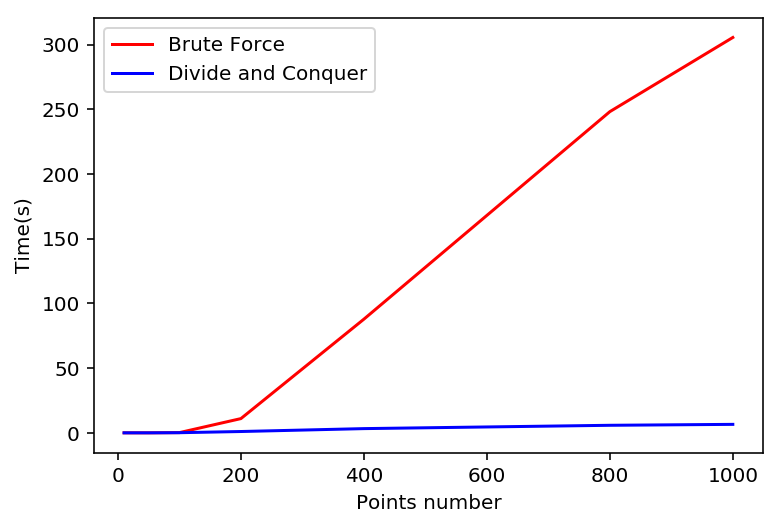

In [147]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
ran_num = [10, 50, 100, 200, 400, 800, 1000]
time_BF = [0.07247071314850473,1.1306175898080255, 4.367298885154014, 17.11317678287014, 68.40440276057234, 285.2177600424711, 281.04598619713215]
time_DC = [0.05849336400569882, 0.24383082640270004, 0.5869339939836209, 1.0857511944795988, 2.9346182976460113, 6.421559723941755, 6.164778977172318]

def func(x, a, b):
    return  a * np.exp(b/x)

popt1, pcov1 = curve_fit(func, ran_num, time_BF)
popt2, pcov2 = curve_fit(func, ran_num, time_DC)

a1 = popt1[0]
b1 = popt1[1]
a2 = popt2[0]
b2 = popt2[1]

BFval = func(ran_num, a1, b1)
DCval = func(ran_num, a2, b2)

BFplot = plt.plot(ran_num, BFval, 'r', label='Brute Force')
DCplot = plt.plot(ran_num, DCval, 'b', label='Divide and Conquer')

plt.xlabel('Points number')
plt.ylabel('Time(s)')
plt.legend(loc = 2)
plt.show()

* For brute force algorithm:
    $T(N) = O(N^2)$
* For divide and conquer algorithm:
    $T(N) = O(NlogN)$
    
When the N grows larger, the time complex of brute force will be higher than divide and conquer. And, the time for brute force will increase faster than  divide and conquer.
In the plot, the red line represents the time complex of Brute force algorithm, and the blue line represents the divide and conquer algorithm. From the plot, it is easy to substantiate the expectation.

# 5. Recurrence Relation
Define the runtime recurrence relation that would arise if you would not pass sorted lists down the recursion but instead would sort the lists explicitly on each level of the recursion.

### Answer:
###### The time complex of sorting :
* Bubble Sort:
    $T(n) = O(n^2)$ (Worst)
    $T(n) = O(n)$   (Best)
* Select Sort:
    $T(n) = O(n^2)$ (Worst)
    $T(n) = O(n^2)$ (Best)
* Insert Sort:
    $T(n) = O(n^2)$ (Worst)
    $T(n) = O(n)$   (Best)
* Merge Sort:
    $T(n) = O(nlogn)$ (Worst)
    $T(n) = O(nlogn)$ (Best)
    
###### The time complex of divide and conquer:
  $T(n) = O(nlogn)$

If the lists sort on each level of the recursion, every time the recuresion running, it will run a sorting in a sorted list. Even the sorting is in the best situation, there is still a time wasted, $O(n)$ or $O(n^2)$ or $O(nlogn)$. For each divide with conquer, the time complex would be $O(n^2logn)$ in best situation. 
If the sorting is done before the recursion, there is only a sorting time complex before the divide and conquer and in the worst situation, the time complex would be $O(n^2 + nlogn)$.
$$n^2logn - (n^2 + nlogn)$$
$$= n^2logn - n^2(\frac{n-1}{n}logn - 1)$$ 
$$= n^2(\frac{n-1}{n}logn - 1)$$
If the n is larger than 13, there will be a positive result.

# Visualisation
Visualize the point sets, the splitlines, and ultimately the results

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

def basic_plot(p_set):
    xp = []
    yp = []
    for i in p_set.p_set:
        xp.append(i.get_point()[0])
        yp.append(i.get_point()[1])
    
    figure(figsize=(16,14))
    plt.scatter(xp, yp)
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.show()


In [54]:
def nearest_mid(p_set):
    p_set.sort()
    basic_plot(p_set)
    mid_n = p_set.p_num()//2
    mid_x = (p_set.get_p(mid_n - 1).get_point()[0] + p_set.get_p(mid_n).get_point()[0])/2.0
    plt.vlines(mid_x,0, 1000, color = 'k', linestyle = 'solid', label='Middle Line')
    
    (d, pp1, pp2) = p_set.nearest_DC()
    """
    xx = pp1[0]
    x_ymin = min(pp1[1], pp2[1])
    x_ymax = max(pp1[1], pp2[1])
    
    yy = pp2[1]
    y_xmin = min(pp1[0], pp2[0])
    y_xmax = max(pp1[0], pp2[0])
    """
    xx = pp1.get_point()[0]
    x_ymin = min(pp1.get_point()[1], pp2.get_point()[1])
    x_ymax = max(pp1.get_point()[1], pp2.get_point()[1])
    
    yy = pp2.get_point()[1]
    y_xmin = min(pp1.get_point()[0], pp2.get_point()[0])
    y_xmax = max(pp1.get_point()[0], pp2.get_point()[0])
    
    plt.vlines(xx,x_ymin, x_ymax, color = 'r', linestyle = 'solid', label='Manhatton Distance', linewidth=2.5)
    plt.plot([y_xmin, y_xmax],[yy, yy], '-', color = 'r', linestyle = 'solid', linewidth=2.5)
    
    plt.legend(loc = 2)
    plt.show()


In [50]:
import random
newList = Point_set([])
for i in range(10):
    newList.append_p(Point(random.randint(0, 1000), random.randint(0, 1000)))
    
newList.print_str()

['(704, 304)',
 '(613, 177)',
 '(847, 799)',
 '(781, 528)',
 '(821, 312)',
 '(152, 748)',
 '(818, 935)',
 '(586, 235)',
 '(74, 347)',
 '(445, 607)']

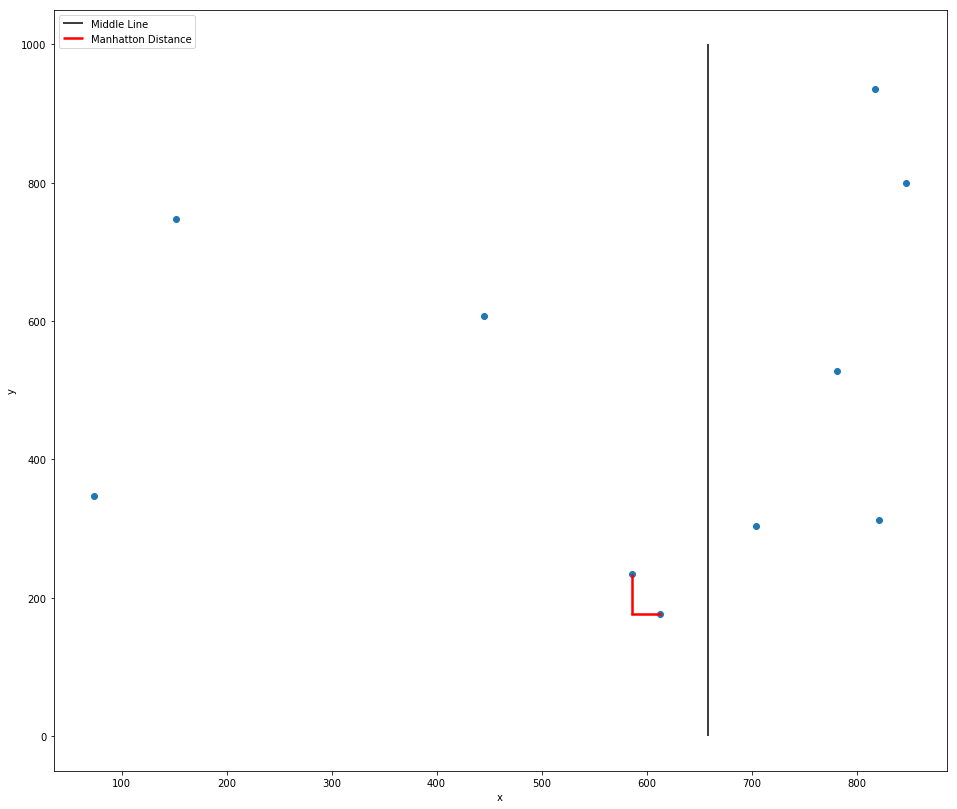

In [56]:
nearest_mid(newList)